(0.0, 101936.26089545265)

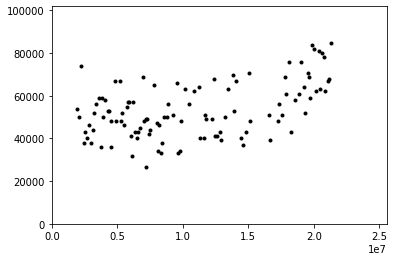

In [36]:
import json
import matplotlib.pyplot as plt
import numpy as np

#with open("data/baby1.json") as datafile:
with open("data/baby2.json") as datafile:
  data = json.load(datafile)

time_msec = []
contraction_length_msec = []
for entry in data["contractions"]:
    time_msec.append(entry["startTime"])
    contraction_length_msec.append(entry["duration"])

time_msec = np.array(time_msec)
contraction_length_msec = np.array(contraction_length_msec)
indexes = time_msec.argsort()
time_msec = time_msec[indexes]
contraction_length_msec = contraction_length_msec[indexes]


plt.plot(time_msec, contraction_length_msec, '.', color='black')
plt.xlim([0, max(time_msec)*1.2])
plt.ylim([0, max(contraction_length_msec)*1.2])

(0.0, 101936.26089545265)

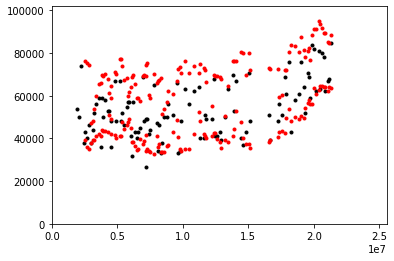

In [37]:

WINDOW_SIZE = 5
NUM_SIGMAS = 2

means = []
standard_devs = []
mean_upper = []
mean_lower = []
windowed_time_msec = time_msec[WINDOW_SIZE-1:len(contraction_length_msec)]
for i in range(WINDOW_SIZE-1, len(contraction_length_msec)):
    contraction_sub_array = contraction_length_msec[i-WINDOW_SIZE+1:i+1]
    mean = np.mean(contraction_sub_array)
    standard_dev = np.std(contraction_sub_array)
    means.append(mean)
    standard_devs.append(standard_dev)
    mean_upper.append(mean+NUM_SIGMAS*standard_dev)
    mean_lower.append(mean+NUM_SIGMAS-standard_dev)

plt.plot(time_msec, contraction_length_msec, '.', color='black')
plt.plot(windowed_time_msec, mean_upper, '.', color='red')
plt.plot(windowed_time_msec, mean_lower, '.', color='red')
plt.xlim([0, max(time_msec)*1.2])
plt.ylim([0, max(contraction_length_msec)*1.2])



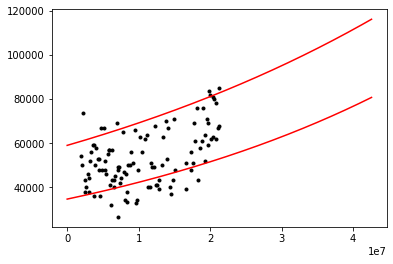

In [38]:
# Exponential model
log_mean_upper = np.log(mean_upper)
log_mean_lower = np.log(mean_lower)
log_curve_fit_upper = np.polyfit(windowed_time_msec, log_mean_upper, 1)
log_curve_fit_lower = np.polyfit(windowed_time_msec, log_mean_lower, 1)

projected_time = []
for i in range(0, int(max(time_msec)*2), 1000):
  projected_time.append(i)
projected_time = np.array(projected_time)
exp_mean_upper_projected = np.exp(log_curve_fit_upper[1]) * np.exp(log_curve_fit_upper[0]*projected_time)
exp_mean_lower_projected = np.exp(log_curve_fit_lower[1]) * np.exp(log_curve_fit_lower[0]*projected_time)
plt.plot(time_msec, contraction_length_msec, '.', color='black')
plt.plot(projected_time, exp_mean_upper_projected, '-', color='red')
plt.plot(projected_time, exp_mean_lower_projected, '-', color='red')

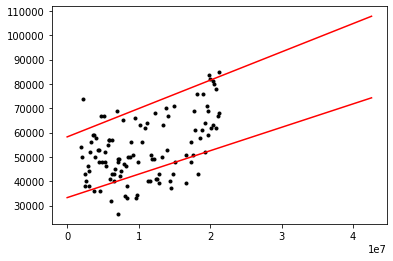

In [39]:
# Linear model
linear_curve_fit_upper = np.polyfit(windowed_time_msec, mean_upper, 1)
linear_curve_fit_lower = np.polyfit(windowed_time_msec, mean_lower, 1)
projected_time = []
for i in range(0, int(max(time_msec)*2), 1000):
  projected_time.append(i)
projected_time = np.array(projected_time)
linear_mean_upper_projected = linear_curve_fit_upper[1] + linear_curve_fit_upper[0]*projected_time
linear_mean_lower_projected = linear_curve_fit_lower[1] + linear_curve_fit_lower[0]*projected_time
plt.plot(time_msec, contraction_length_msec, '.', color='black')
plt.plot(projected_time, linear_mean_upper_projected, '-', color='red')
plt.plot(projected_time, linear_mean_lower_projected, '-', color='red')